# Outlier Detection and Removal

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../results/outputs/data_cleaned_encoded_telco_data.csv")

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,1,0,0.0,1,29.85,29.85,...,False,True,False,False,True,False,False,True,False,False
1,1,0,0,0,34,1,1.0,0,56.95,1889.50,...,True,True,False,False,True,False,False,True,False,False
2,1,0,0,0,2,1,0.0,1,53.85,108.15,...,False,True,False,False,True,False,False,True,False,False
3,1,0,0,0,45,0,1.0,0,42.30,1840.75,...,True,False,False,True,True,False,False,True,False,False
4,0,0,0,0,2,1,0.0,1,70.70,151.65,...,False,True,False,False,True,False,False,True,False,False


In [5]:
# Select numeric columns
num_cols = ['tenure','MonthlyCharges','TotalCharges']
df[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [6]:
# Detect Outliers (IQR method)
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

outliers_mc = find_outliers_iqr(df['MonthlyCharges'])
outliers_tc = find_outliers_iqr(df['TotalCharges'])

print("MonthlyCharges outliers:", len(outliers_mc))
print("TotalCharges outliers:", len(outliers_tc))

MonthlyCharges outliers: 0
TotalCharges outliers: 0


In [7]:
# Opt 1: Remove outliers
df_no_outliers = df.copy()
df_no_outliers = df_no_outliers[~df_no_outliers['MonthlyCharges'].isin(outliers_mc)]
df_no_outliers = df_no_outliers[~df_no_outliers['TotalCharges'].isin(outliers_tc)]

In [8]:
# Opt 2: Cap outliers
df_no_outliers = df.copy()

Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df_no_outliers['MonthlyCharges'] = df_no_outliers['MonthlyCharges'].clip(lower, upper)

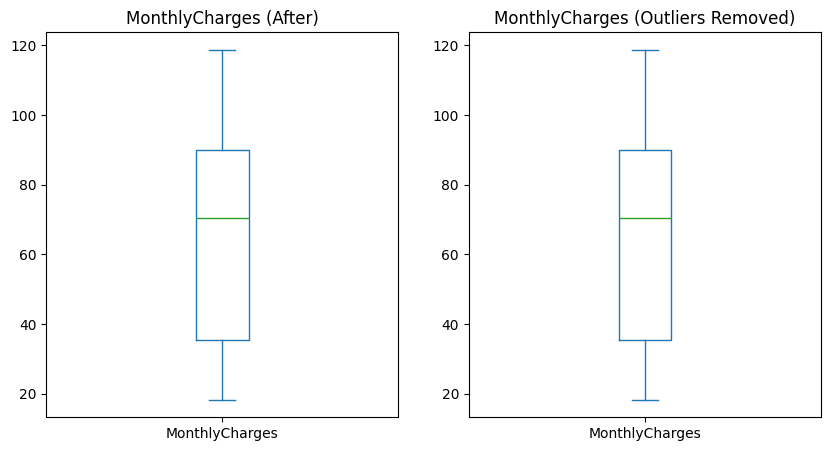

In [9]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
df['MonthlyCharges'].plot(kind='box', title='MonthlyCharges (After)')
plt.subplot(1,2,2)
df_no_outliers['MonthlyCharges'].plot(kind='box', title='MonthlyCharges (Outliers Removed)')

plt.show()

In [10]:
df.to_csv('../results/outputs/outliers_removed_telco_data.csv', index=False)